Prerequisites
- intermediate Python
- Supervised learning with scikit-learn (scikit-learn, supervised learning)

In [10]:
import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()

X, y = newsgroups.data, newsgroups.target

X.shape

y.shape

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X, y)

y_pred = knn.predict(X)

# Test score is too high, 0.99, but the problem is, we were fitting using the training data
knn.score(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y)

knn.fit(X_train, y_train)

# get 0.66 accuracy
knn.score(X_test, y_test)

0.6645457758925415

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
print("Prediction for test example 0:", pred)

Model selection - selecting a model with a higher accuracy, e.g. KNN with N = 1 or with N =5 (based on score)

**Logistic Regression**

Is a linear classifier

In [ ]:
# Using logistic regression:
from sklearn.linear_model import LogisticRegression
import sklearn.datasets

# instantiate the classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
lr.score(X_test, y_test)

wine = sklearn.datasets.load_wine()

In [10]:
import sklearn.datasets

wine = sklearn.datasets.load_wine()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(wine.data, wine.target)
lr.score(wine.data, wine.target)

C:\Users\oleksiysyrotkin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9662921348314607

In [13]:
# outputting confidence scores instead of hard predictions:
# high probability for the first class, low probabilities for the other 2 classes
lr.predict_proba(wine.data[:1])

wine.data[:1]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03]])

**LinearSVC**

Linear support vector classifier (SVM)

Works the same way as LogisticRegression

In [5]:
import sklearn.datasets

wine = sklearn.datasets.load_wine()

from sklearn.svm import LinearSVC

svm = LinearSVC()

svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)



C:\Users\oleksiysyrotkin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9101123595505618

**SVC**

Non-linear SVM

In [6]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()

from sklearn.svm import SVC

svm = SVC() # default hyperparameters
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)


0.7078651685393258

When using more complex models, there is a risk of overfitting! E.g. using a non-linear SVC where a linear SVC should do.

**Hyperparameter** - choice about the model you make before fitting the data. Controls the complexity of the model.

**Underfitting** - model too simple, low training accuracy.

**Overfitting** - model too complex, low test accuracy.

In [27]:
# Exercise:
# Applying LogisticRegression and SVC to digits data
from sklearn.model_selection import train_test_split
from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))
print(svm.score(X_test, y_test))

1.0
0.9622222222222222


C:\Users\oleksiysyrotkin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'SVC' is not defined

In [ ]:
# Sentiment analysis
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

What makes a classifier linear?

Decision boundary - line that separates areas of "different classification" (?) e.g. area 

If the decision boundary is a straight line, then the classifier is linear.

**Classification** - learning to predict categories (y values are categories)

**Regression** - learning to predict a contiguous value (y-values are contiguous)

**Linear classifier** - classifier that learns linear decision boundaries

**Linearly separable** - data set can be explained by a linear classifier.

In [ ]:
# Exercise: visualizing decision boundaries:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
# plot_4_classifiers needs to be defined, like 
# here:https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
plot_4_classifiers(X, y, classifiers)
plt.show()

# Chapter 2: Loss functions


In [18]:
import numpy as np
x = np.arange(3)
y = np.arange(3, 6)

# dot product:
np.sum(x*y)

# recent python versions: @ for dot product
x@y

14

`raw model output = coefficients * features + intercept`

Linear classifier prediction: compute raw model output, check the sign.
- positive: predict one class
- negative: predict other class

Logistic Regression and linear SVM
- different fit functions, but same predict functions
- difference in fit is related to the loss function

In [19]:
lr = LogisticRegression()

lr.fit(X, y)

lr.predict(X)[10]

lr.coef_ @ X[10] + lr.intercept_ # raw model output

# output negative => predict one class

lr.coef_ @ X[20] + lr.intercept_ # raw model output

# output positive => predict another class

NameError: name 'X' is not defined

Loss functions

Linear regression minimizes loss:

Sum of squares (true ith value - predicted ith target value)^2

Score function - not the same as loss function

In [21]:
# minimizing functions:
from scipy.optimize import minimize

minimize(np.square, 0).x
# outputs 0

minimize(np.square, 2).x
# outputs -1.88e-08

array([-1.88846401e-08])

In [4]:
# Exercise: minimizing a loss function:
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
y = boston.target

# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-9.28967767e-02  4.87153030e-02 -4.05652768e-03  2.85398862e+00
 -2.86846955e+00  5.92815781e+00 -7.26931162e-03 -9.68514356e-01
  1.71156263e-01 -9.39662313e-03 -3.92187236e-01  1.49054807e-02
 -4.16303782e-01]
[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


## Loss function diagrams

Linear regression loss function - parabola - does not work for linear classifiers. In linear classifiers we don't care how far we are from 1, we just care about the sign. If we are on the positive side of the plot, the loss should be minimal.

Logistic regression loss - smooth version of the 0-1 loss

Hinge loss - loss used in SVMs.

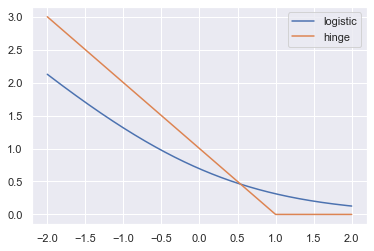

In [14]:
# Exercise: plotting loss functions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
sns.set()
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

In [15]:
# minimizing loss function:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(len(X)):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[[ 1.09683963  0.52011027  0.25623872 -0.01645238 -0.04158076 -0.19438604
  -0.27196799 -0.11469031 -0.05756601 -0.01154023  0.04813672  0.43966648
   0.18219892 -0.13179003 -0.00373598 -0.04157467 -0.05798396 -0.01489177
  -0.01389833 -0.00387131  1.16637706 -0.58054026 -0.24845823 -0.01488104
  -0.07521871 -0.60478095 -0.75273062 -0.22036334 -0.18192594 -0.05833046]]


C:\Users\oleksiysyrotkin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



# Chapter 3: Logistic Regression

Regularization combats overfitting by making model coefficients smaller.

scikit-learn C: inverse of regularization strength

Regularization penalizes large values of coefficients

Without regularization, we maximize training accuracy

Regularization: higher test accuracy

Lasso = linear regression with L1 regularization

Ridge = linear regression with L2 regularization

L1 - also performs feature selection

C:\Users\oleksiysyrotkin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oleksiysyrotkin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


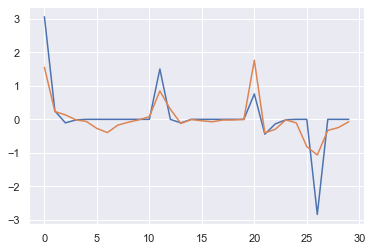

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target)

lr_L1 = LogisticRegression(penalty='l1', solver='liblinear')
lr_L2 = LogisticRegression(penalty='l2') # penalty='l2' by default

lr_L1.fit(X_train, y_train)
lr_L2.fit(X_train, y_train)

plt.plot(lr_L1.coef_.flatten())
plt.plot(lr_L2.coef_.flatten())


L1 regularization sets many coefficients to 0 => ignores those features => performs feature selection


C:\Users\oleksiysyrotkin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\oleksiysyrotkin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

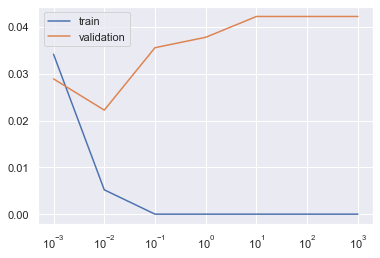

In [29]:
# Train and validaton errors initialized as empty list
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)

train_errs = list()
valid_errs = list()

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Loop over values of C_value
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

# 0.01 is the best value of C
# small C: underfitting (too much regularization)
# large C: overfitting (too little regularization)

In [39]:
from sklearn.model_selection import GridSearchCV

# Specify L1 regularization
lr = LogisticRegression(penalty='l1', solver='liblinear')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 1}
Total number of features: 640
Number of selected features: 360


In [43]:
# Exercise: interpreting LR coefficients:
import numpy as np

# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

# output online as follows:
# Most positive words: favorite, superb, noir, knowing, loved, 

# Most negative words: disappointing, waste, worst, boring, lame, 


AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [44]:
import nltk

ModuleNotFoundError: No module named 'nltk'

## Logistic regression probabilities:

Small C => Regularization => Smaller coefficients => less confident predictions

overconfidence => overfitting

less confidence => less overfitting

2 features: 2 coefficients

Why 2 coefficients, if you only need 1 number to represent the slope?

Ratio of coefficients => slope

Magnitude of coeff => confidence level

Regularization affects 1) confidence, 2) orientation of decision boundary

Probabilities - we get them from raw model output, but they are normalized (projected, squashed) onto [-1, 1] by the **sigmoid** function

Sigmoid:
- raw model = 0 => probability is 0.5
- raw model > 0 => probability (of positive class) tends to 1
- raw model < 0 => probability (of positive class) tends to 0

In [ ]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", prob)

In [ ]:
# Visualizing easy (most confident) and difficult (least confident) examples:

lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit: it was 0 in the example
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit: it was a "weird" 4 in the example
show_digit(proba_inds[0], lr)

### Techniques for multi-class classification
e.g. series of classifiers
```python
lr0 = LogisticRegression()
lr1 = LogisticRegression()
lr2 = LogisticRegression()
```

**one-vs-rest** strategy
```python
lr0.fit(X, y==0) # y==0: array that is true when y == 0, false otherwise
lr1.fit(X, y==1)
lr2.fit(X, y==2)
```

=> take the class whose model gives the largest raw model output:
```python
lr0.decision_function(X)[0]
```
e.g. lr0 output > lr1 output  => predict class 0

* With SVMs, one-vs-rest is more popular

```python
lr_mn = LogisticRegression()
lr_mn.fit(X, y)

lr_mn.coef_
lr_mn.intercept_
```

### Other technique for multiclass:

**Multinomial** (**softmax**, cross-entropy loss):

Fit a single classifier for all classes

```python
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(X, y)

lr_mn.coef_
lr_mn.intercept_
```

Both approaches: number of coefficients: #classes * # features

number of intercepts: #classes

In [45]:
# comparing the fitting of multi-class logistic regression:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 0.9577464788732394
OVR test accuracy    : 0.958041958041958
Softmax training accuracy: 0.9413145539906104
Softmax test accuracy    : 0.916083916083916


C:\Users\oleksiysyrotkin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\oleksiysyrotkin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

# Chapter 4: SVMs

SVM
- linear classifier
- uses hinge loss function
- Standard: uses L2 regularization
- if an example falls into the "zero loss" zone, it does not contribute to the fit


Support vector - a training example that is incorrectly classified or close to the boundary

Kernel SVMs are fast

## Kernel SVMs:
Fitting a linear model in a transformed (squared) space corresponds to fitting a non-linear model (e.g. ellipse) in the original space

```python
from sklearn.svm import SVC
svm = SVC(gamma=1) # default is kernel='rbf'
# gamma hyperparameter controls the smoothness of the boundary
# higher gamma => more training accuracy => overfitting
```

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target == 2 # whether or not digit is 2

# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 0.001}


In [56]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

# output from example:
# Best CV params {'C': 10, 'gamma': 0.0001}
# Best CV accuracy 0.9988864142538976
# Test accuracy of best grid search hypers: 0.9988876529477196

Best CV params {'C': 10, 'gamma': 0.0001}
Best CV accuracy 0.9365800273597811
Test accuracy of best grid search hypers: 0.958041958041958


## Summary Logistic Regression vs. SVM:

Logistic regression
- is linear classifier
- can be used with kernels, but slow
- can output probabilities
- can be extended to multi-class
- all data points affect fit
- L2 or L1 regularization

SVM
- is linear
- can be used with kernels, and is fast
- does not naturally output probabilities
- can be extended to multi-class
- only "support vectors" affect fit
- conventionally L2 regularization (and hinge loss)

## in sklearn
Logistic regression
- `linear_model.LogisticRegression`
- `C`: regularization (small is large)
- `penalty`: type of regularization (l1, l2)
- `multi_class`

SVM
- `svm.LinearSVC` and `svm.SVC` (can also set kernel='linear')
- `C`: regularization
- `kernel`: 'linear', 'rbf', etc.
- `gamma`: inverse RBF smoothness

SGDClassifier
- very fast
- "stochastic gradient descent"
- better for large data sets

```python
from sklearn.linear_model import SGDClassifier

logreg = SGDClassifier(loss='log')
linsvm = SGDClassifier(loss='hinge')
```
- `alpha` hyperparameter is like `1/C`

In [58]:
# Using SGDClassifier to compare logistic regression and SVM
from sklearn.linear_model import SGDClassifier

# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1', 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

# Output:
# Best CV params {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l1'}
# Best CV accuracy 0.94351630867144
# Test accuracy of best grid search hypers: 0.9592592592592593

Best CV params {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
Best CV accuracy 0.9037098560354375
Test accuracy of best grid search hypers: 0.9370629370629371
